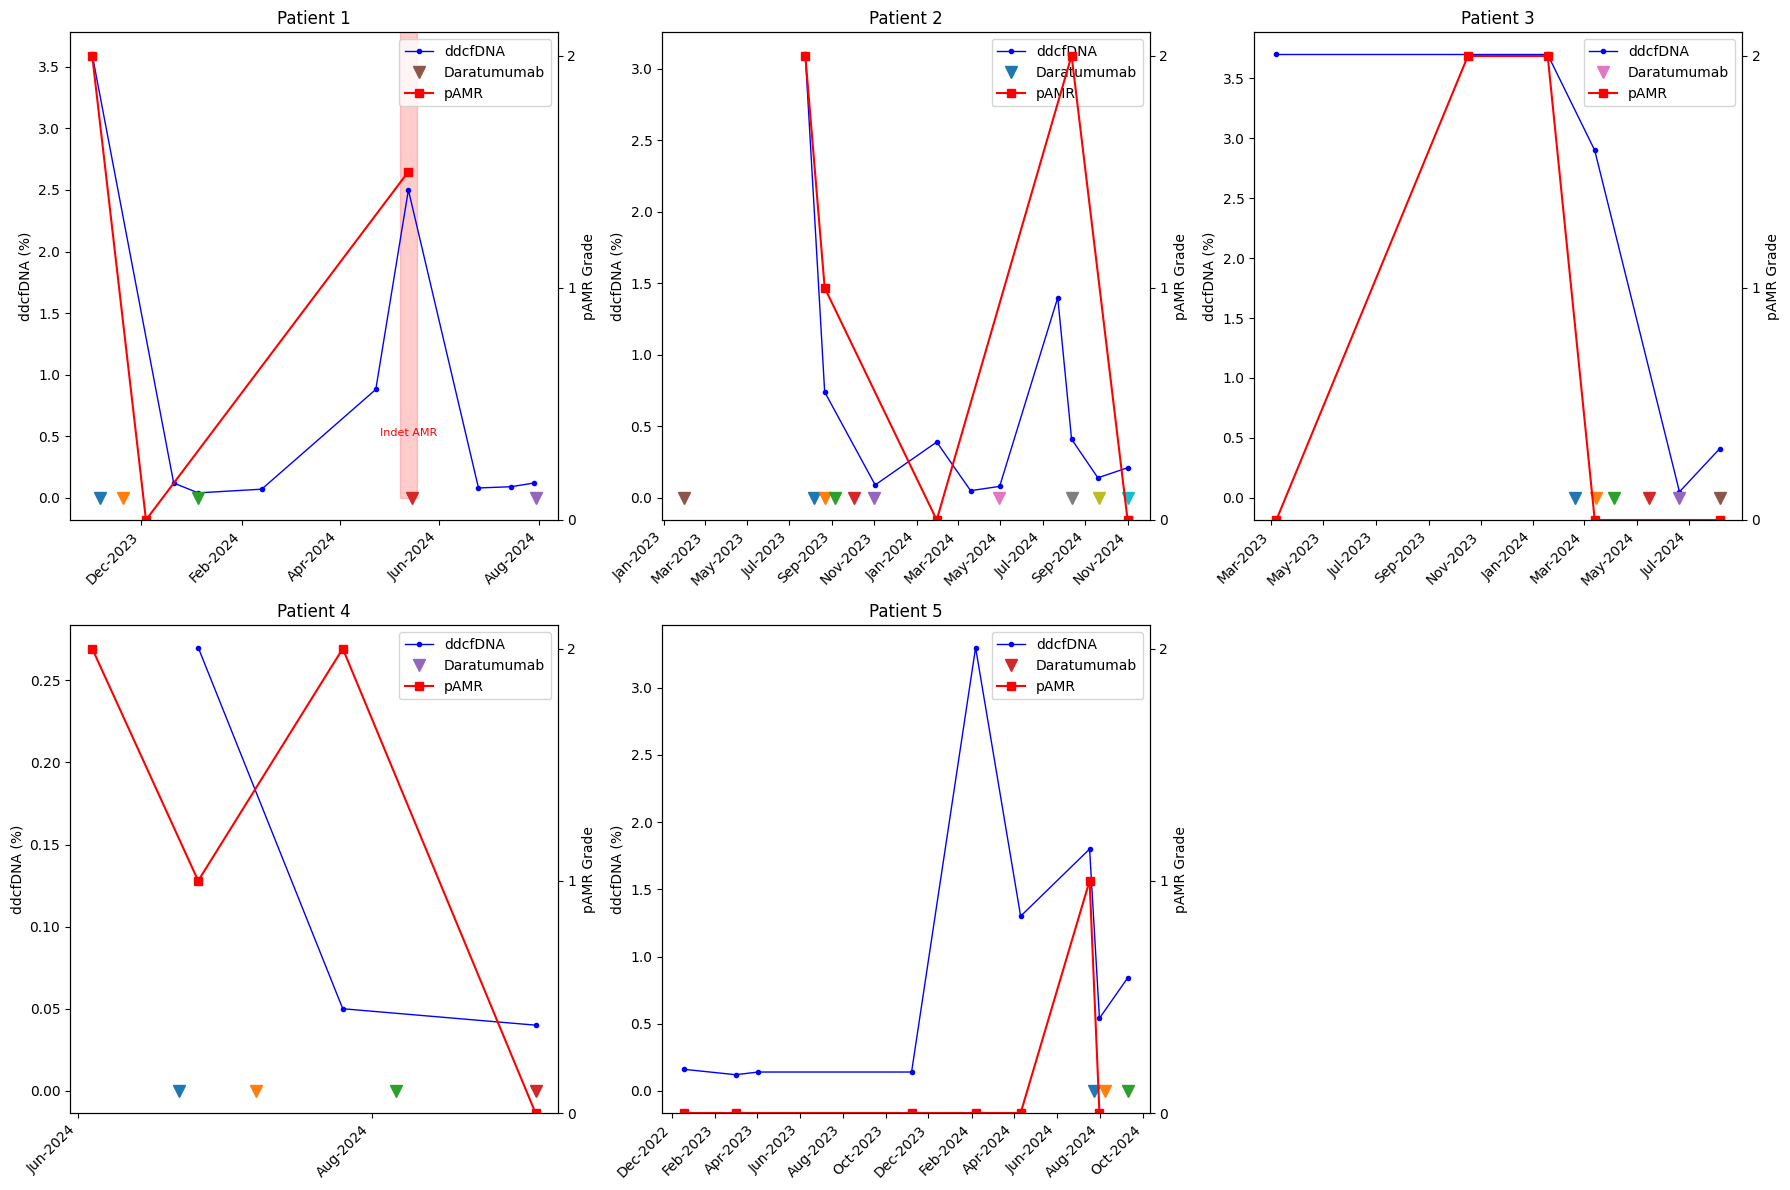

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime
import matplotlib.patches as patches

# Function to convert date string to datetime object
def convert_date(date_str):
    # Handle the date format (day/month/year)
    return datetime.strptime(date_str, '%d/%m/%Y')

# Function to map pAMR grade to numeric value for visualization
def map_pamr_to_numeric(grade):
    if grade == 'pAMR0':
        return 0
    elif grade == 'pAMR1':
        return 1
    elif grade == 'pAMR2':
        return 2
    else:  # Handle indeterminate or other cases
        return 1.5  # Mid-point for indeterminate

# Setup the figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs = axs.flatten()

# Set overall title for the figure
fig.tight_layout(pad=5.0)
fig.subplots_adjust(top=0.9, hspace=0.3)

# Patients data
patients_data = [
    {
        'DNA': [('1/11/2023', 3.6), ('21/12/2023', 0.12), ('5/1/2024', 0.04), ('13/2/2024', 0.07), ('23/4/2024', 0.88), ('13/5/2024', 2.5), ('25/6/2024', 0.08), ('15/7/2024', 0.09), ('29/7/2024', 0.12)],
        'Dara': ['6/11/2023', '20/11/2023', '5/1/2024', '15/5/2024', '30/7/2024'],
        'AMR': [('1/11/2023', 'pAMR2'), ('4/12/2023', 'pAMR0'), ('13/5/2024', 'Indet*')]
    },
    {
        'DNA': [('24/7/2023', 3.1), ('21/8/2023', 0.74), ('2/11/2023', 0.09), ('30/1/2024', 0.39), ('19/3/2024', 0.05), ('30/4/2024', 0.08), ('23/7/2024', 1.4), ('12/8/2024', 0.41), ('19/9/2024', 0.14), ('1/11/2024', 0.21)],
        'Dara': ['5/8/2023', '22/8/2023', '5/9/2023', '3/10/2023', '1/11/2023', '30/1/2023', '29/4/2024', '13/8/2024', '20/9/2024', '1/11/2024'],
        'AMR': [('24/7/2023', 'pAMR2'), ('21/8/2023', 'pAMR1'), ('30/1/2024', 'pAMR0'), ('12/8/2024', 'pAMR2'), ('1/11/2024', 'pAMR0')]
    },
    {
        'DNA': [('7/3/2023', 3.7), ('18/1/2024', 3.7), ('13/3/2024', 2.9), ('20/6/2024', 0.05), ('6/8/2024', 0.41)],
        'Dara': ['19/2/2024', '14/3/2024', '5/4/2024', '15/5/2024', '19/6/2024', '6/8/2024'],
        'AMR': [('7/3/2023', 'pAMR0'), ('17/10/2023', 'pAMR2'), ('18/1/2024', 'pAMR2'), ('13/3/2024', 'pAMR0'), ('6/8/2024', 'pAMR0')]
    },
    {
        'DNA': [('26/6/2024', 0.27), ('26/7/2024', 0.05), ('4/9/2024', 0.04)],
        'Dara': ['22/6/2024', '8/7/2024', '6/8/2024', '4/9/2024'],
        'AMR': [('4/6/2024', 'pAMR2'), ('26/6/2024', 'pAMR1'), ('26/7/2024', 'pAMR2'), ('4/9/2024', 'pAMR0')]
    },
    {
        'DNA': [('19/12/2022', 0.16), ('2/3/2023', 0.12), ('3/4/2023', 0.14), ('7/11/2023', 0.14), ('6/2/2024', 3.3), ('10/4/2024', 1.3), ('17/7/2024', 1.8), ('31/7/2024', 0.54), ('9/9/2024', 0.84)],
        'Dara': ['23/7/2024', '8/8/2024', '9/9/2024'],
        'AMR': [('19/12/2022', 'pAMR0'), ('2/3/2023', 'pAMR0'), ('7/11/2023', 'pAMR0'), ('6/2/2024', 'pAMR0'), ('10/4/2024', 'pAMR0'), ('17/7/2024', 'pAMR1'), ('31/7/2024', 'pAMR0')]
    }
]

# Create a plot for each patient
for i, patient_data in enumerate(patients_data):
    if i >= len(axs):  # In case there are more patients than subplots
        break
        
    ax = axs[i]
    ax2 = ax.twinx()  # Create a second y-axis
    
    # Convert DNA data to datetime and values
    dna_dates = [convert_date(d[0]) for d in patient_data['DNA']]
    dna_values = [d[1] for d in patient_data['DNA']]
    
    # Convert Daratumumab dates to datetime
    dara_dates = [convert_date(d) for d in patient_data['Dara']]
    
    # Plot DNA data with connected lines
    ax.plot(dna_dates, dna_values, 'b.-', label='ddcfDNA', linewidth=1, markersize=6)
    
    # Plot Daratumumab treatments as green triangles at the top
    for date in dara_dates:
        ax.plot(date, 0, 'v', markersize=8, label='_nolegend_')  # No label to avoid duplicate in legend
    
    # Handle the first one for legend
    if dara_dates:
        ax.plot([], [], 'v', markersize=8, label='Daratumumab')
        
    # Convert AMR data to datetime and values
    if 'AMR' in patient_data and patient_data['AMR']:
        amr_dates = [convert_date(d[0]) for d in patient_data['AMR']]
        amr_grades = [d[1] for d in patient_data['AMR']]
        amr_numeric = [map_pamr_to_numeric(grade) for grade in amr_grades]
        
        # Create mapping between dates and pAMR grades for annotation
        amr_dict = {convert_date(d[0]): d[1] for d in patient_data['AMR']}
        
        # Plot pAMR data on the secondary y-axis
        if amr_dates:
            # Create rectangles for pAMR values
            for j, (date, grade) in enumerate(zip(amr_dates, amr_grades)):
                # Find the closest DNA date
                if j < len(amr_dates) - 1:
                    next_date = amr_dates[j + 1]
                    width = (next_date - date).days
                else:
                    # For the last point, extend to the end of our time frame or use a fixed width
                    if dna_dates and date < max(dna_dates):
                        width = (max(dna_dates) - date).days
                    else:
                        width = 30  # Default width in days
                
                # Map pAMR grade to numeric value for plotting
                numeric_grade = map_pamr_to_numeric(grade)
                
                # Plot pAMR as a line on the secondary axis
                ax2.plot([date, date], [0, numeric_grade], 'r-', alpha=0)
                
                # Plot the actual pAMR value as a red square
                ax2.plot(date, numeric_grade, 'rs', markersize=6)
                
                # Connect pAMR points with a line
                if j > 0:
                    prev_date = amr_dates[j-1]
                    prev_grade = map_pamr_to_numeric(amr_grades[j-1])
                    ax2.plot([prev_date, date], [prev_grade, numeric_grade], 'r-')
            
            # Add the pAMR line to the legend
            ax2.plot([], [], 'rs-', label='pAMR')
    
    # Highlight indeterminate pAMR
    for date_str, grade in patient_data.get('AMR', []):
        if 'Indet' in grade:
            date = convert_date(date_str)
            rect = patches.Rectangle((mdates.date2num(date) - 5, 0), 10, 4, 
                                  linewidth=1, edgecolor='r', facecolor='r', alpha=0.2)
            ax.add_patch(rect)
            ax.annotate('Indet AMR', (date, 0.5), color='r', fontsize=8, ha='center')
    
    # Set labels and title
    ax.set_ylabel('ddcfDNA (%)')
    ax2.set_ylabel('pAMR Grade')
    ax.set_title(f'Patient {i+1}')
    
    # Set y-axis limits for pAMR grades
    ax2.set_ylim(0, 2.1)
    ax2.set_yticks([0, 1, 2])
    ax2.set_yticklabels(['0', '1', '2'])
    
    # Format x-axis dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # Add legends
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Hide any unused subplots
for i in range(len(patients_data), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.savefig('patient_plots.png', dpi=300, bbox_inches='tight')
plt.show()

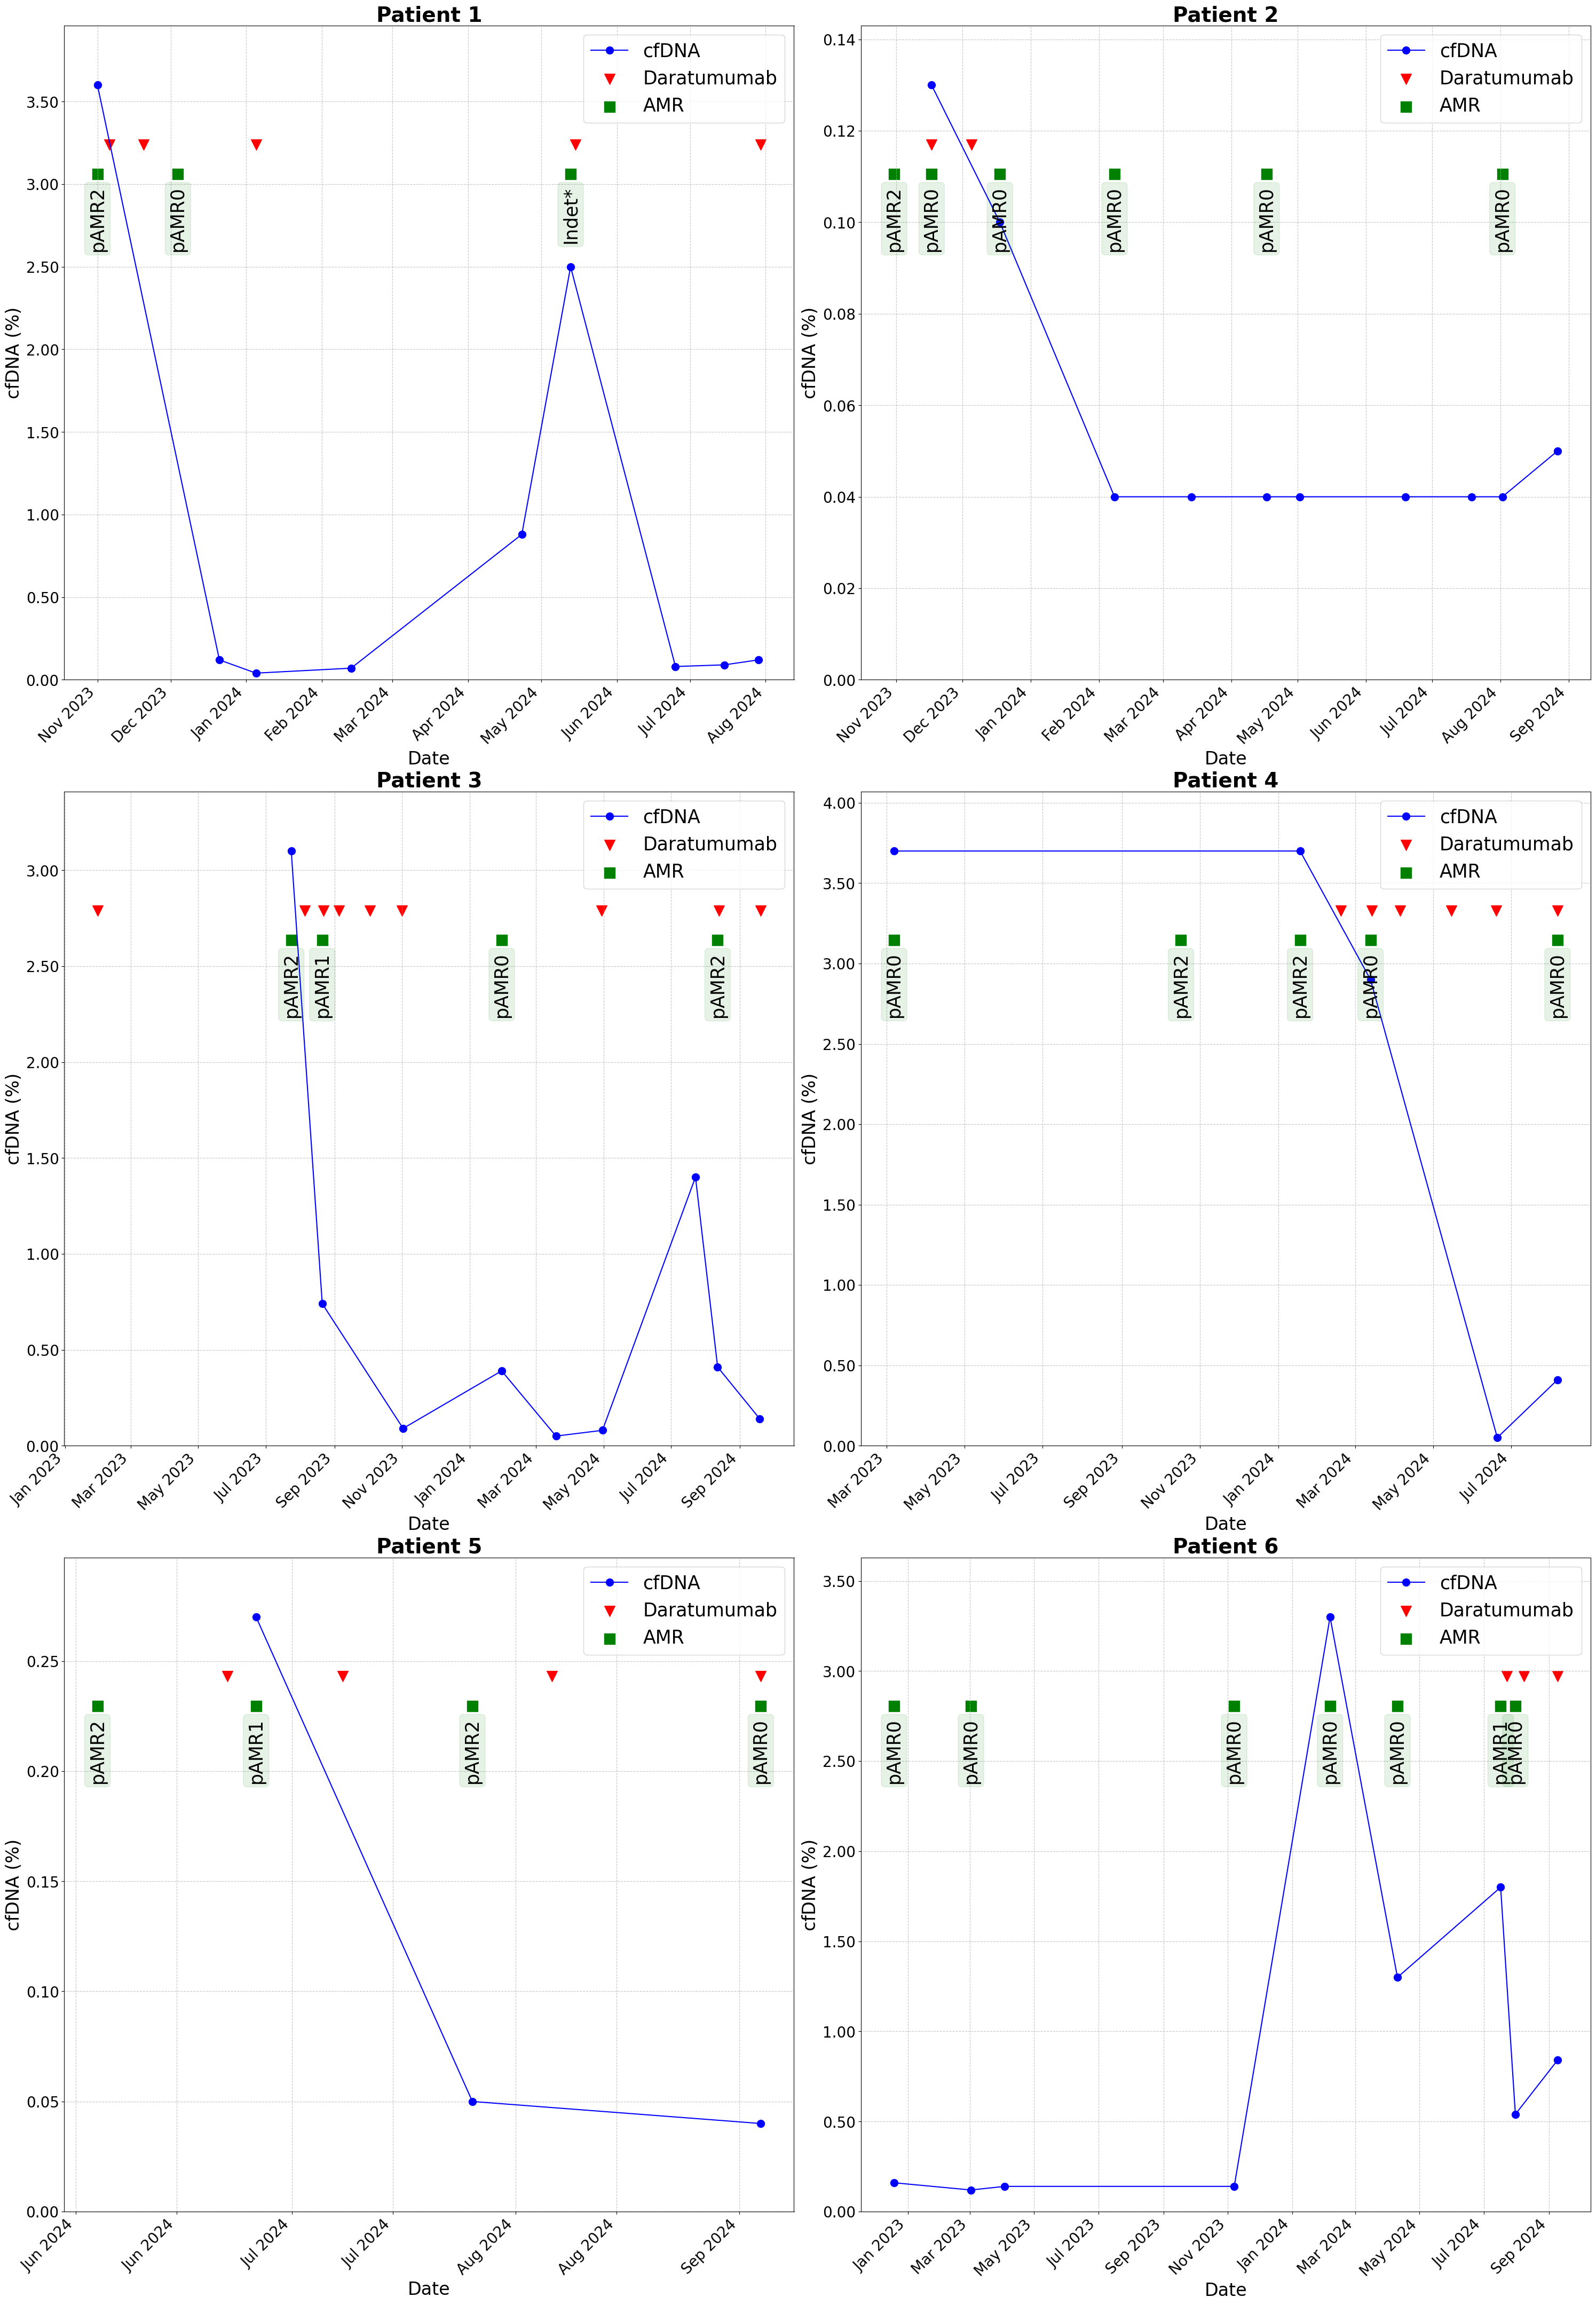

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

def parse_date(date_string):
    return datetime.strptime(date_string, '%d/%m/%Y')


def create_patient_subplot(ax, patient_data, patient_num):
    # Parse DNA data
    dates, cfdna = zip(*[(parse_date(date), value) for date, value in patient_data['DNA']])
    
    
    # Plot cfDNA
    ax.plot(dates, cfdna, marker='o', linestyle='-', color='blue', label='cfDNA', markersize=10)
    
    # Calculate the y-position for markers and annotations
    y_max = max(cfdna)
    dara_height = 0.90
    amr_marker_height = 0.85
    amr_annotation_height = 0.83  # Reduced spacing between marker and annotation
    
    # Plot Daratumumab dates
    dara_dates = [parse_date(date) for date in patient_data['Dara']]
    ax.scatter(dara_dates, [y_max * dara_height]*len(dara_dates), marker='v', color='red', s=200, label='Daratumumab')
    
    # Plot AMR grades
    amr_dates = [parse_date(date) for date, _ in patient_data['AMR']]
    amr_grades = [grade for _, grade in patient_data['AMR']]
    
    ax.scatter(amr_dates, [y_max * amr_marker_height]*len(amr_dates), marker='s', color='green', s=200, label='AMR')
    
    for date, grade in zip(amr_dates, amr_grades):
        ax.annotate(grade, (date, y_max * amr_annotation_height), rotation=90, va='top', ha='center', bbox=dict(boxstyle='round,pad=0.2', fc="green", alpha=0.1, ec='green'), fontsize=25)

    # Set title and labels
    ax.set_title(f'Patient {patient_num}', fontsize=28, fontweight='bold')
    ax.set_xlabel('Date', fontsize=24)
    ax.set_ylabel('cfDNA (%)', fontsize=24)
    
    # Set y-axis to start from 0 and format to show at least 2 decimal places
    ax.set_ylim(bottom=0, top=y_max * 1.1)  # Adjust top limit to accommodate markers
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.2f}"))
    
    # Format x-axis
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=20)
    
    # Increase tick label font size
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    # Add legend
    ax.legend(loc='upper right', fontsize=25)

    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)

def plot_patient_data(patients_data):
    fig, axs = plt.subplots(3, 2, figsize=(30, 45))  # Further increased figure size    
    for i, (ax, data) in enumerate(zip(axs.flatten(), patients_data)):
        create_patient_subplot(ax, data, i+1)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Use the provided patients_data
plot_patient_data(patients_data)


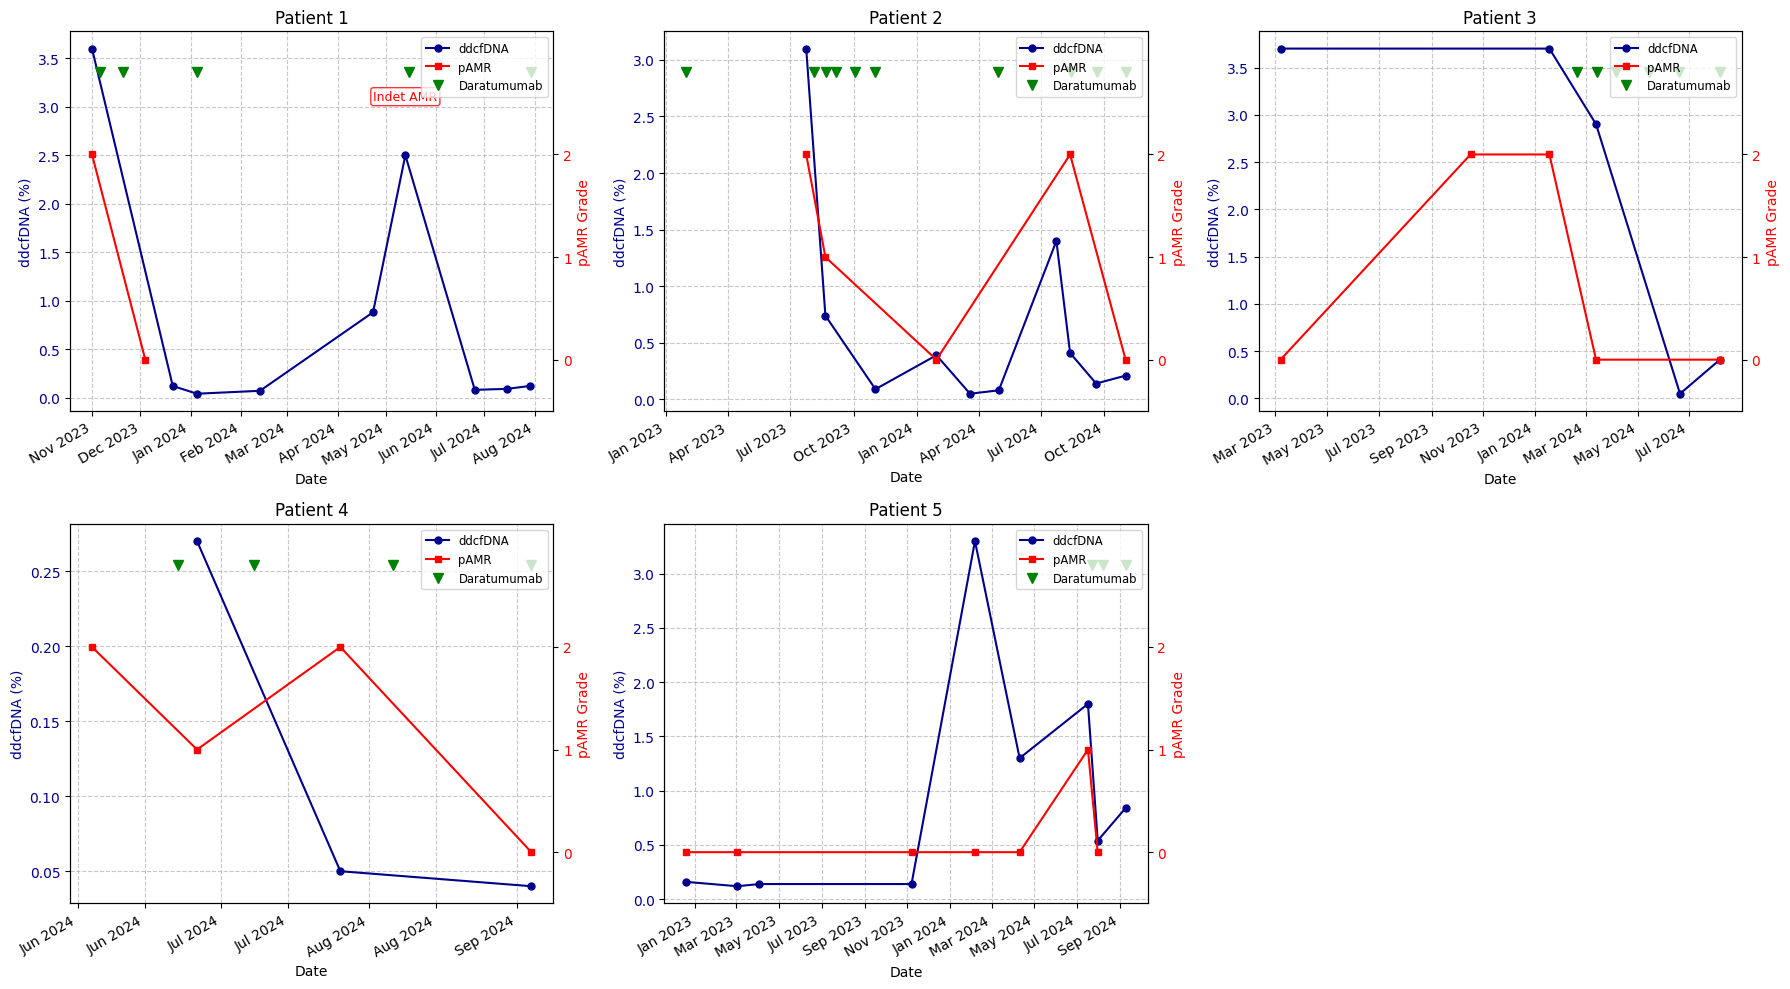

Plots generated and saved as patients_plots_new.png


In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Data for all patients (new_patients_data)
patients_data = [
    {
        'DNA': [('1/11/2023', 3.6), ('21/12/2023', 0.12), ('5/1/2024', 0.04), ('13/2/2024', 0.07), ('23/4/2024', 0.88), ('13/5/2024', 2.5), ('25/6/2024', 0.08), ('15/7/2024', 0.09), ('29/7/2024', 0.12)],
        'Dara': ['6/11/2023', '20/11/2023', '5/1/2024', '15/5/2024', '30/7/2024'],
        'AMR': [('1/11/2023', 'pAMR2'), ('4/12/2023', 'pAMR0'), ('13/5/2024', 'Indet*')]
    },
    {
        'DNA': [('24/7/2023', 3.1), ('21/8/2023', 0.74), ('2/11/2023', 0.09), ('30/1/2024', 0.39), ('19/3/2024', 0.05), ('30/4/2024', 0.08), ('23/7/2024', 1.4), ('12/8/2024', 0.41), ('19/9/2024', 0.14), ('1/11/2024', 0.21)],
        'Dara': ['5/8/2023', '22/8/2023', '5/9/2023', '3/10/2023', '1/11/2023', '30/1/2023', '29/4/2024', '13/8/2024', '20/9/2024',  '1/11/2024'],
        'AMR': [('24/7/2023', 'pAMR2'), ('21/8/2023', 'pAMR1'), ('30/1/2024', 'pAMR0'), ('12/8/2024', 'pAMR2'), ('1/11/2024', 'pAMR0')]
    },
    {
        'DNA': [('7/3/2023', 3.7), ('18/1/2024', 3.7), ('13/3/2024', 2.9), ('20/6/2024', 0.05), ('6/8/2024', 0.41)],
        'Dara': ['19/2/2024', '14/3/2024', '5/4/2024', '15/5/2024', '19/6/2024', '6/8/2024'],
        'AMR': [('7/3/2023', 'pAMR0'), ('17/10/2023', 'pAMR2'), ('18/1/2024', 'pAMR2'), ('13/3/2024', 'pAMR0'), ('6/8/2024', 'pAMR0')]
    },
    {
        'DNA': [('26/6/2024', 0.27), ('26/7/2024', 0.05), ('4/9/2024', 0.04)],
        'Dara': ['22/6/2024', '8/7/2024', '6/8/2024', '4/9/2024'],
        'AMR': [('4/6/2024', 'pAMR2'), ('26/6/2024', 'pAMR1'), ('26/7/2024', 'pAMR2'), ('4/9/2024', 'pAMR0')]
    },
    {
        'DNA': [('19/12/2022', 0.16), ('2/3/2023', 0.12), ('3/4/2023', 0.14), ('7/11/2023', 0.14), ('6/2/2024', 3.3), ('10/4/2024', 1.3), ('17/7/2024', 1.8), ('31/7/2024', 0.54), ('9/9/2024', 0.84)],
        'Dara': ['23/7/2024', '8/8/2024', '9/9/2024'],
        'AMR': [('19/12/2022', 'pAMR0'), ('2/3/2023', 'pAMR0'), ('7/11/2023', 'pAMR0'), ('6/2/2024', 'pAMR0'), ('10/4/2024', 'pAMR0'), ('17/7/2024', 'pAMR1'), ('31/7/2024', 'pAMR0')]
    }
]

def plot_patient_data(ax, patient_data, patient_id):
    # Parse DNA data
    dna_dates_str, dna_values = zip(*patient_data['DNA'])
    dna_dates = [datetime.strptime(d, '%d/%m/%Y') for d in dna_dates_str]

    # Parse Dara data
    dara_dates = [datetime.strptime(d, '%d/%m/%Y') for d in patient_data['Dara']]

    # Parse AMR data
    amr_plot_dates = []
    amr_plot_values = []
    indet_amr_points = []

    amr_map = {'pAMR0': 0, 'pAMR1': 1, 'pAMR2': 2}
    for date_str, grade_str in patient_data['AMR']:
        date_obj = datetime.strptime(date_str, '%d/%m/%Y')
        if grade_str == 'Indet*':
            indet_amr_points.append({'date': date_obj, 'label_text': 'Indet AMR'})
        elif grade_str in amr_map:
            amr_plot_dates.append(date_obj)
            amr_plot_values.append(amr_map[grade_str])
            
    # Primary Y-axis for ddcfDNA
    ax.plot(dna_dates, dna_values, 'o-', color='darkblue', label='ddcfDNA', markersize=5)
    ax.set_xlabel("Date")
    ax.set_ylabel("ddcfDNA (%)", color='darkblue')
    ax.tick_params(axis='y', labelcolor='darkblue')
    ax.grid(True, linestyle='--', alpha=0.7)

    # Secondary Y-axis for pAMR Grade
    ax2 = ax.twinx()
    
    # Plot pAMR
    if amr_plot_dates: # Only plot if there are valid AMR points
        ax2.plot(amr_plot_dates, amr_plot_values, 's-', color='red', label='pAMR', markersize=5)
    
    # Plot Daratumumab markers on the secondary axis
    # Use a fixed y-value for Dara markers on the pAMR scale for visual indication
    # Based on the example, it's typically high on the pAMR scale. Let's use 2.8.
    # Ensure this value is sensible with pAMR y-axis limits.
    dara_y_val = 2.8 
    ax2.plot(dara_dates, [dara_y_val] * len(dara_dates), 'v', color='green', label='Daratumumab', markersize=7)
    
    ax2.set_ylabel("pAMR Grade", color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Set pAMR y-axis limits (similar to example image)
    ax2.set_ylim(-0.5, 3.2) # Adjusted to accommodate Dara markers and pAMR grades
    ax2.set_yticks([0, 1, 2]) # pAMR grades
    
    # Add Indet* AMR text annotations
    for point in indet_amr_points:
        # Position the text slightly above the pAMR line or at a visible spot
        # Using the maximum of current pAMR values, or a default if no pAMR data
        y_text_pos = max(amr_plot_values) + 0.5 if amr_plot_values else 1.5
        # Ensure text is within the plot area, slightly above the max pAMR data if available
        ax2.text(point['date'], y_text_pos, point['label_text'], color='red', fontsize=9, ha='center', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='red', alpha=0.8))


    # Formatting X-axis for dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    # Title
    ax.set_title(f"Patient {patient_id}")

    # Legends
    # Combine legends from both axes
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    # Place legend inside the plot, adjust location as needed
    # Example: upper right, but might need to change per plot if it overlaps data.
    # For consistency with the original image, let's try to make it compact and in a good spot.
    ax2.legend(lines + lines2, labels + labels2, loc='upper right', fontsize='small')


# Create figure and subplots
# 5 patients, using a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(18, 10)) # Adjusted figsize for better layout
axs_flat = axs.flatten() # Flatten the 2D array of axes for easy iteration

for i, patient_data_item in enumerate(patients_data):
    plot_patient_data(axs_flat[i], patient_data_item, i + 1)

# Hide any unused subplots
for j in range(len(patients_data), len(axs_flat)):
    fig.delaxes(axs_flat[j])

plt.tight_layout() # Adjust subplot params for a tight layout
plt.savefig("patients_plots_new.png", dpi=300)
plt.show()

print("Plots generated and saved as patients_plots_new.png")

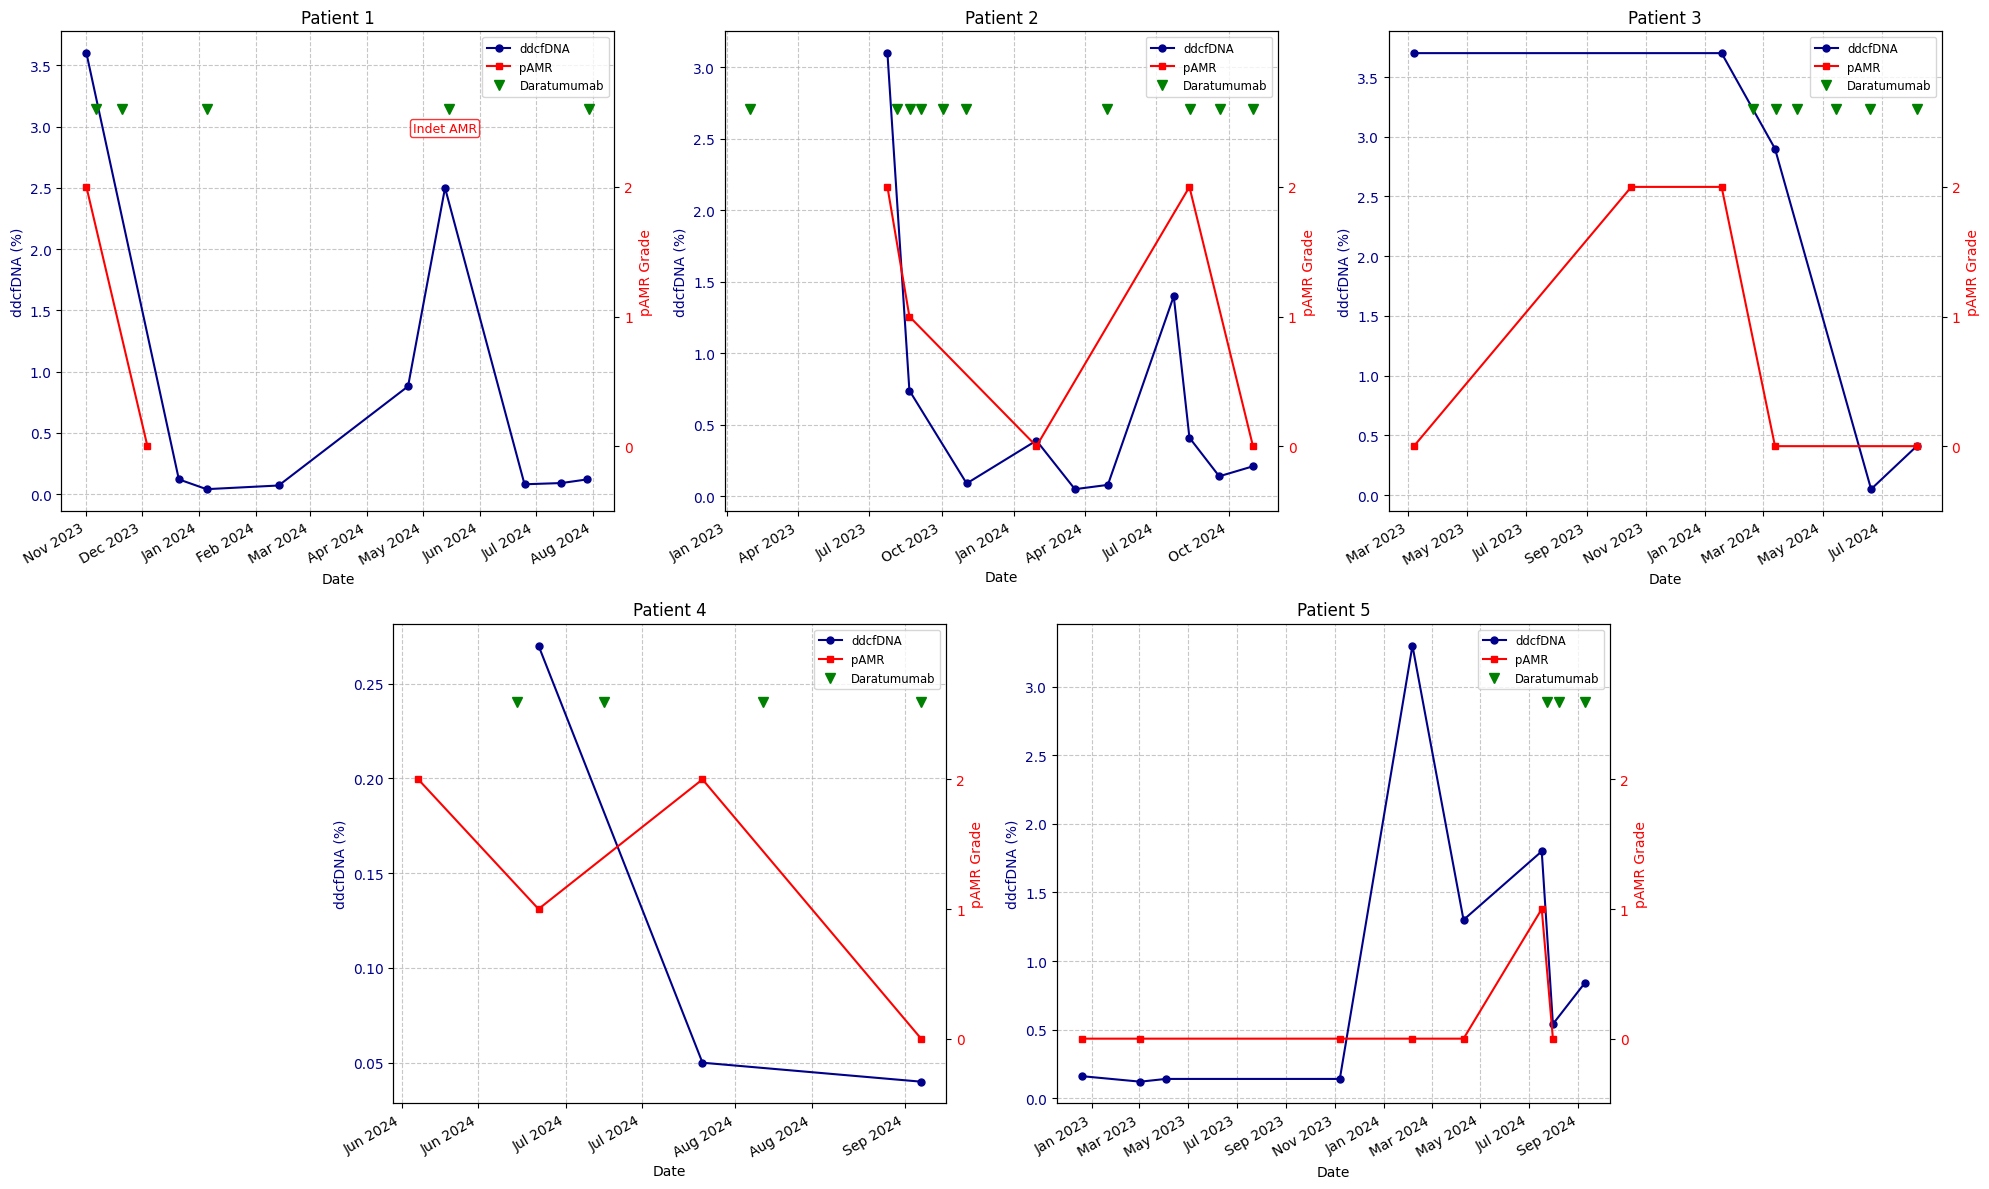

Plots generated and saved as patients_plots_new_adjusted.png


In [9]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.gridspec as gridspec

# Data for all patients (new_patients_data)
patients_data = [
    {
        'DNA': [('1/11/2023', 3.6), ('21/12/2023', 0.12), ('5/1/2024', 0.04), ('13/2/2024', 0.07), ('23/4/2024', 0.88), ('13/5/2024', 2.5), ('25/6/2024', 0.08), ('15/7/2024', 0.09), ('29/7/2024', 0.12)],
        'Dara': ['6/11/2023', '20/11/2023', '5/1/2024', '15/5/2024', '30/7/2024'],
        'AMR': [('1/11/2023', 'pAMR2'), ('4/12/2023', 'pAMR0'), ('13/5/2024', 'Indet*')]
    },
    {
        'DNA': [('24/7/2023', 3.1), ('21/8/2023', 0.74), ('2/11/2023', 0.09), ('30/1/2024', 0.39), ('19/3/2024', 0.05), ('30/4/2024', 0.08), ('23/7/2024', 1.4), ('12/8/2024', 0.41), ('19/9/2024', 0.14), ('1/11/2024', 0.21)],
        'Dara': ['5/8/2023', '22/8/2023', '5/9/2023', '3/10/2023', '1/11/2023', '30/1/2023', '29/4/2024', '13/8/2024', '20/9/2024',  '1/11/2024'],
        'AMR': [('24/7/2023', 'pAMR2'), ('21/8/2023', 'pAMR1'), ('30/1/2024', 'pAMR0'), ('12/8/2024', 'pAMR2'), ('1/11/2024', 'pAMR0')]
    },
    {
        'DNA': [('7/3/2023', 3.7), ('18/1/2024', 3.7), ('13/3/2024', 2.9), ('20/6/2024', 0.05), ('6/8/2024', 0.41)],
        'Dara': ['19/2/2024', '14/3/2024', '5/4/2024', '15/5/2024', '19/6/2024', '6/8/2024'],
        'AMR': [('7/3/2023', 'pAMR0'), ('17/10/2023', 'pAMR2'), ('18/1/2024', 'pAMR2'), ('13/3/2024', 'pAMR0'), ('6/8/2024', 'pAMR0')]
    },
    {
        'DNA': [('26/6/2024', 0.27), ('26/7/2024', 0.05), ('4/9/2024', 0.04)],
        'Dara': ['22/6/2024', '8/7/2024', '6/8/2024', '4/9/2024'],
        'AMR': [('4/6/2024', 'pAMR2'), ('26/6/2024', 'pAMR1'), ('26/7/2024', 'pAMR2'), ('4/9/2024', 'pAMR0')]
    },
    {
        'DNA': [('19/12/2022', 0.16), ('2/3/2023', 0.12), ('3/4/2023', 0.14), ('7/11/2023', 0.14), ('6/2/2024', 3.3), ('10/4/2024', 1.3), ('17/7/2024', 1.8), ('31/7/2024', 0.54), ('9/9/2024', 0.84)],
        'Dara': ['23/7/2024', '8/8/2024', '9/9/2024'],
        'AMR': [('19/12/2022', 'pAMR0'), ('2/3/2023', 'pAMR0'), ('7/11/2023', 'pAMR0'), ('6/2/2024', 'pAMR0'), ('10/4/2024', 'pAMR0'), ('17/7/2024', 'pAMR1'), ('31/7/2024', 'pAMR0')]
    }
]

def plot_patient_data(ax, patient_data, patient_id):
    # Parse DNA data
    dna_dates_str, dna_values = zip(*patient_data['DNA'])
    dna_dates = [datetime.strptime(d, '%d/%m/%Y') for d in dna_dates_str]

    # Parse Dara data
    dara_dates = [datetime.strptime(d, '%d/%m/%Y') for d in patient_data['Dara']]

    # Parse AMR data
    amr_plot_dates = []
    amr_plot_values = []
    indet_amr_points = []

    amr_map = {'pAMR0': 0, 'pAMR1': 1, 'pAMR2': 2}
    for date_str, grade_str in patient_data['AMR']:
        date_obj = datetime.strptime(date_str, '%d/%m/%Y')
        if grade_str == 'Indet*':
            indet_amr_points.append({'date': date_obj, 'label_text': 'Indet AMR'})
        elif grade_str in amr_map:
            amr_plot_dates.append(date_obj)
            amr_plot_values.append(amr_map[grade_str])
            
    # Primary Y-axis for ddcfDNA
    ax.plot(dna_dates, dna_values, 'o-', color='darkblue', label='ddcfDNA', markersize=5)
    ax.set_xlabel("Date")
    ax.set_ylabel("ddcfDNA (%)", color='darkblue')
    ax.tick_params(axis='y', labelcolor='darkblue')
    ax.grid(True, linestyle='--', alpha=0.7)

    # Secondary Y-axis for pAMR Grade
    ax2 = ax.twinx()
    
    if amr_plot_dates:
        ax2.plot(amr_plot_dates, amr_plot_values, 's-', color='red', label='pAMR', markersize=5)
    
    # Adjusted y-value for Dara markers to avoid legend overlap
    dara_y_val = 2.6 
    ax2.plot(dara_dates, [dara_y_val] * len(dara_dates), 'v', color='green', label='Daratumumab', markersize=7)
    
    ax2.set_ylabel("pAMR Grade", color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    ax2.set_ylim(-0.5, 3.2) 
    ax2.set_yticks([0, 1, 2]) 
    
    for point in indet_amr_points:
        y_text_pos = max(amr_plot_values) + 0.5 if amr_plot_values else 1.5
        # Ensure y_text_pos is within reasonable bounds of the pAMR axis
        y_text_pos = min(y_text_pos, ax2.get_ylim()[1] * 0.75) # Cap at 85% of ymax to ensure visibility
        ax2.text(point['date'], y_text_pos, point['label_text'], color='red', fontsize=9, ha='center', va='bottom',
                 bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='red', alpha=0.8))

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

    ax.set_title(f"Patient {patient_id}")

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    # Add framealpha for slightly transparent legend box
    ax2.legend(lines + lines2, labels + labels2, loc='upper right', fontsize='small', framealpha=0.8)


# Create figure using GridSpec for custom layout
fig = plt.figure(figsize=(20, 12)) 
gs = gridspec.GridSpec(2, 6, figure=fig) # 2 rows, 6 columns

axs_map = [
    fig.add_subplot(gs[0, 0:2]), # Patient 1
    fig.add_subplot(gs[0, 2:4]), # Patient 2
    fig.add_subplot(gs[0, 4:6]), # Patient 3
    fig.add_subplot(gs[1, 1:3]), # Patient 4 (centered on bottom row)
    fig.add_subplot(gs[1, 3:5])  # Patient 5 (centered on bottom row)
]

for i, patient_data_item in enumerate(patients_data):
    if i < len(axs_map): # Ensure we don't try to plot more patients than we have subplots
        plot_patient_data(axs_map[i], patient_data_item, i + 1)

plt.tight_layout() 
plt.savefig("patients_plots_new_adjusted.png", dpi=300)
plt.show()

print("Plots generated and saved as patients_plots_new_adjusted.png")